In [1]:
# 1. magic for inline plot
# 2. magic to print version
# 3. magic so that the notebook will reload external python modules
# 4. magic to enable retina (high resolution) plots
# https://gist.github.com/minrk/3301035
%matplotlib inline
%load_ext watermark
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%watermark -a 'Ethen' -d -t -v -p numpy,pandas,sklearn,matplotlib

Ethen 2018-04-09 11:55:38 

CPython 3.6.4
IPython 6.2.1

numpy 1.14.2
pandas 0.22.0
sklearn 0.19.1
matplotlib 2.2.2


# Time Series Cross Validation

- https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/
- https://blog.insightdatascience.com/whats-wrong-with-my-time-series-model-validation-without-a-hold-out-set-94151d38cf5b
- https://robjhyndman.com/hyndsight/tscvexample/
- https://robjhyndman.com/hyndsight/tscv/

In [19]:
sunspot_col = 'sunspot'
df = pd.read_csv('zuerich-monthly-sunspot-numbers-.csv', index_col = 'Month')[:-1]
df.columns = [sunspot_col]
print('dimension:')
df.head()

dimension:


,sunspot
Month,
1749-01,58.0
1749-02,62.6
1749-03,70.0
1749-04,55.7
1749-05,85.0


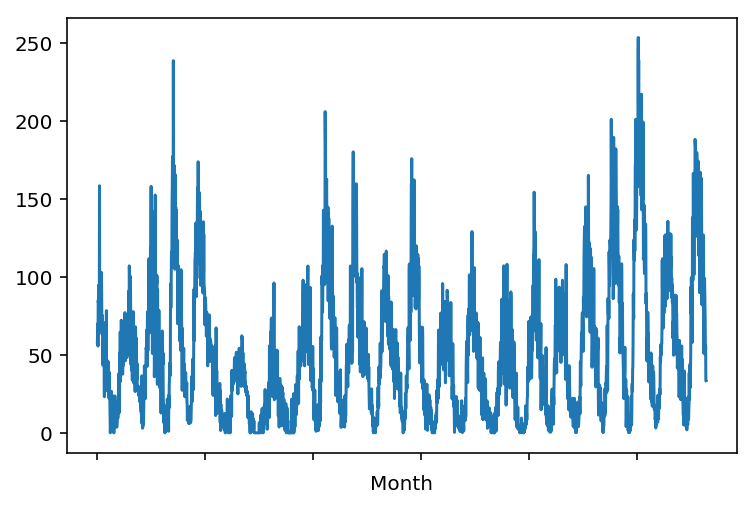

In [6]:
df[sunspot_col].plot()
plt.show()

The test size stays consistent, this means that the performance statistics calculated on the predictions of each trained model will be consistent and can be combined and compared.

In [7]:
from sklearn.model_selection import TimeSeriesSplit
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
tscv = TimeSeriesSplit(n_splits=3)
print(tscv)  

for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TimeSeriesSplit(max_train_size=None, n_splits=3)
TRAIN: [0] TEST: [1]
TRAIN: [0 1] TEST: [2]
TRAIN: [0 1 2] TEST: [3]


Observations: 1410
Training Observations: 705
Testing Observations: 705
Observations: 2115
Training Observations: 1410
Testing Observations: 705
Observations: 2820
Training Observations: 2115
Testing Observations: 705


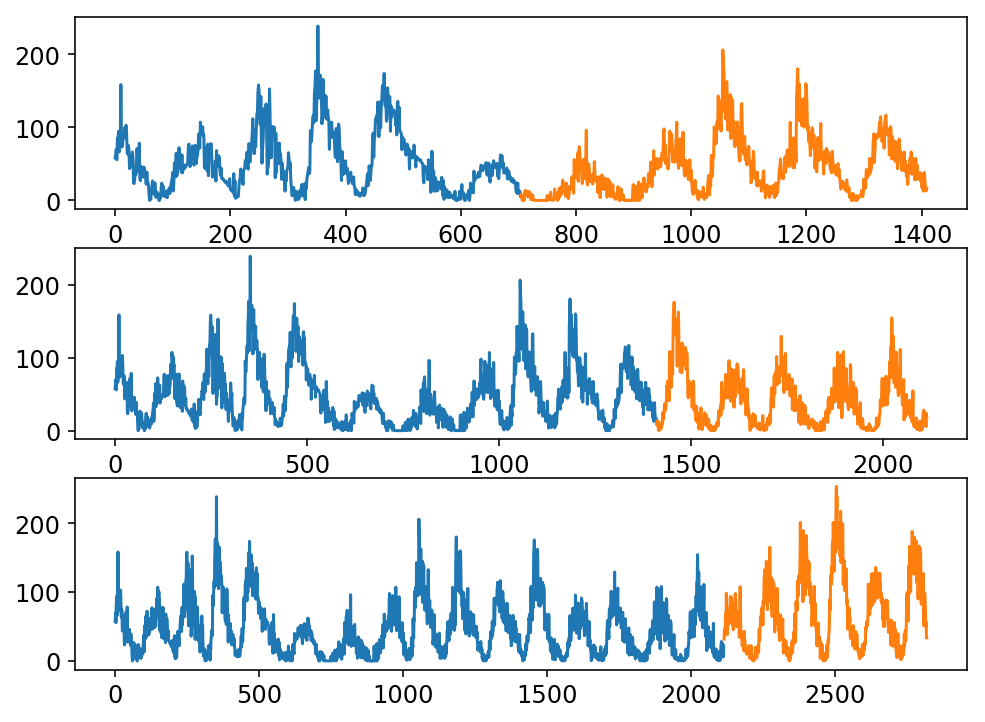

In [28]:
# change default style figure and font size
plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['font.size'] = 12

X = df[sunspot_col].values

ts_splits = TimeSeriesSplit(n_splits = 3)
plt.figure(1)
index = 1
for train_index, test_index in ts_splits.split(X):
    train = X[train_index]
    test = X[test_index]
    print('Observations: %d' % (len(train) + len(test)))
    print('Training Observations: %d' % (len(train)))
    print('Testing Observations: %d' % (len(test)))
    plt.subplot(310 + index)
    plt.plot(train)
    plt.plot([None for i in train] + [x for x in test])
    index += 1

plt.show()

In [22]:
n_samples = X.shape[0]
n_samples

2820

In [23]:
n_splits = 3
n_folds = n_splits + 1
test_size = n_samples // n_folds
test_starts = range(test_size + n_samples % n_folds,
                            n_samples, test_size)
test_starts

range(705, 2820, 705)

In [26]:
n_folds

4

In [25]:
n_samples % n_folds

0

In [13]:
test_size

1

In [ ]:
for test_start in test_starts:
    if self.max_train_size and self.max_train_size < test_start:
        yield (indices[test_start - self.max_train_size:test_start],
               indices[test_start:test_start + test_size])
    else:
        yield (indices[:test_start],
               indices[test_start:test_start + test_size])

In [8]:
X

array([[1, 2],
       [3, 4],
       [1, 2],
       [3, 4]])